<a href="https://colab.research.google.com/github/somalur/Pytorch-Test/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.model_selection as sk
import numpy as np
%matplotlib inline

In [2]:
# Create Model Class that inherits nn.Module
class Model(nn.Module):
    def __init__(self,in_features=4,h1=8,h2=8,h3=8,out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.fc3 = nn.Linear(h2,h3)
        self.out = nn.Linear(h3,out_features)

    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.out(x)

        return x



In [3]:
# Pick a Manual Seed

In [4]:
torch.manual_seed(42)
model = Model()

In [5]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [6]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
my_df["species"] = my_df["species"].replace('setosa',0.0)
my_df["species"] = my_df["species"].replace('versicolor',1.0)
my_df["species"] = my_df["species"].replace('virginica',2.0)
my_df

<ipython-input-7-65a9e3041472>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df["species"] = my_df["species"].replace('virginica',2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [8]:
X = my_df.drop('species',axis=1)
y = my_df['species']

X = X.values
y = y.values


In [9]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:

#Floats Tensor

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

#Long Tensor
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [10]:
#Set Error Criteria
criterion = nn.CrossEntropyLoss()
#Choose Adam Optimizer
optimizier = torch.optim.Adam(model.parameters(),lr=0.01)

In [16]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)>

In [17]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())


  if i%10 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  #Back Propagation
  optimizier.zero_grad()
  loss.backward()
  optimizier.step()




Epoch: 0 Loss: 1.0970520973205566
Epoch: 10 Loss: 0.9550312161445618
Epoch: 20 Loss: 0.5784670114517212
Epoch: 30 Loss: 0.2848553955554962
Epoch: 40 Loss: 0.12693321704864502
Epoch: 50 Loss: 0.07134398818016052
Epoch: 60 Loss: 0.060987688601017
Epoch: 70 Loss: 0.061116185039281845
Epoch: 80 Loss: 0.05628184974193573
Epoch: 90 Loss: 0.05506211519241333


<function matplotlib.pyplot.show(close=None, block=None)>

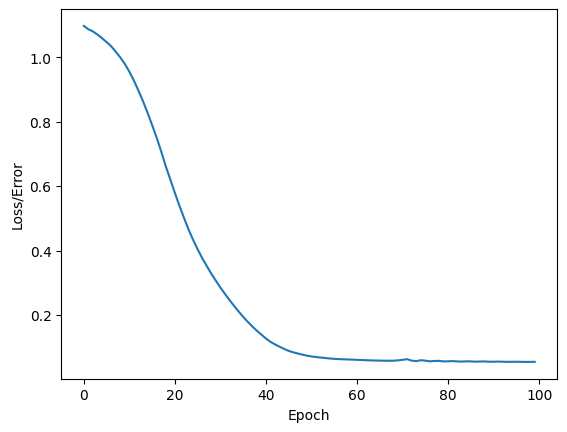

In [18]:
plt.plot(range(epochs),losses)
plt.ylabel("Loss/Error")
plt.xlabel("Epoch")
plt.show

In [20]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval,y_test)


In [21]:
loss

tensor(0.0349)

In [25]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Virginica"
    elif y_test[i] == 1:
      x = "Versicolor"
    else:
      x = "Setosa"

    print(f'{i+1.} {str(y_val)} \t {x} \t {y_val.argmax().item()}')
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'We got {correct} correct')
print(f'Accuracy: {round(correct/len(y_test),3)}')


1.0 tensor([-3.9622,  7.7491,  2.1599]) 	 Versicolor 	 1
2.0 tensor([ 14.9695,   6.7908, -31.2196]) 	 Virginica 	 0
3.0 tensor([-15.9560,  10.5122,  21.7213]) 	 Setosa 	 2
4.0 tensor([-4.4000,  7.6734,  2.9643]) 	 Versicolor 	 1
5.0 tensor([-4.4547,  8.3412,  2.6465]) 	 Versicolor 	 1
6.0 tensor([ 14.1259,   6.4093, -29.4450]) 	 Virginica 	 0
7.0 tensor([ 0.4615,  7.1026, -5.3514]) 	 Versicolor 	 1
8.0 tensor([-9.7227,  8.6345, 11.7773]) 	 Setosa 	 2
9.0 tensor([-6.1892,  7.6879,  6.2023]) 	 Versicolor 	 1
10.0 tensor([-0.8702,  7.2683, -3.0696]) 	 Versicolor 	 1
11.0 tensor([-8.3994,  8.3205,  9.6346]) 	 Setosa 	 2
12.0 tensor([ 12.9151,   5.8618, -26.8977]) 	 Virginica 	 0
13.0 tensor([ 14.4680,   6.5640, -30.1647]) 	 Virginica 	 0
14.0 tensor([ 13.1489,   5.9675, -27.3896]) 	 Virginica 	 0
15.0 tensor([ 14.0483,   6.3742, -29.2817]) 	 Virginica 	 0
16.0 tensor([-4.2366,  8.0560,  2.3971]) 	 Versicolor 	 1
17.0 tensor([-12.9094,   8.6124,  17.5072]) 	 Setosa 	 2
18.0 tensor([-1.3063,

In [26]:
new_iris = torch.tensor([4.7,3.2,1.3,0.2])

In [28]:
with torch.no_grad():
  print(model(new_iris))


tensor([ 12.9244,   5.8660, -26.9171])


In [30]:
newer_iris = torch.tensor([5.9,3.0,5.1,1.8])
with torch.no_grad():
  print(model(newer_iris))

tensor([-8.8674,  7.7877, 10.8376])


In [34]:
# Save our NN Model
torch.save(model.state_dict(),'iris_model.pt')

new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<ipython-input-34-1051dfeb3c4e>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('iris_model.pt'))


<All keys matched successfully>

In [35]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)